## <font color='#eb3483'>Predicting life expectancy</font>

How do factors like immunization, mortality, economic, social and health affect life expectancy? In this assignment we will be using these and other factors to predict life expectancy in countries around the world. 
The data we'll be using comes from [The Global Health Observatory (GHO) data repository under World Health Organization (WHO)](https://www.who.int/data/gho/info/gho-odata-api) and is provided here in the file `life-expectancy-data.csv`. Columns in the dataset include a country's development status, life expectancy, adult mortality rates of both sexes (i.e., the probability of dying between 15 and 60 years per 1000 population), number of infant deaths per 1000 population, alcohol consumption per capita (in litres of pure alcohol), percentage expenditure on health as percentage of GDP, Hepatitis B immunization coverage among 1-year-olds (%), measles (number of reported cases per 1000 population), polio immunization, diphtheria immunization, HIV/AIDS prevalence (%), and many more. 

Do exploratory data analysis to help determine what features to select for predicting life expectancy. Build a regression model using the selected features. How do these features affect the model? You can begin to ask questions like what is the are $R^2$ and $R^2_{adj}$ of the model? What happens to these metrics as more input variables are added to the model? 

Feature selection is an important part of machine learning, often requiring domain knowledge. To help you get started take a look at this article [Feature Selection with sklearn and Pandas](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b).


In [8]:
from IPython.display import Image
import pandas as pd
import numpy as np

import seaborn as sns
sns.set(rc={'figure.figsize':(6,5)}) 
import warnings
warnings.simplefilter("ignore")

In [9]:
who = pd.read_csv("data/life-expectancy-data.csv")
who.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [10]:
who = who.drop(['Country', 'Year', 'Status'], axis = "columns")
who.head()

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [11]:
who = who.dropna(axis = "rows")
who.head(65)

,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,74.9,127.0,11,7.53,96.166534,88.0,0,56.9,12,95.0,6.85,98.0,0.1,576.883829,39145488.0,1.1,1.0,0.780,16.3
91,74.7,13.0,11,7.63,719.366380,81.0,0,56.3,12,91.0,6.84,98.0,0.1,4251.574348,38728696.0,1.1,1.0,0.775,16.3
92,74.1,137.0,11,7.62,57.584674,73.0,0,55.7,13,95.0,8.22,96.0,0.1,333.437600,3839379.0,1.2,1.0,0.770,16.4
93,74.1,138.0,12,7.81,470.186915,66.0,0,55.1,13,94.0,8.31,93.0,0.1,2579.193168,3788937.0,1.2,1.0,0.776,16.3


In [12]:
who.columns

Index(['Life expectancy', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', 'BMI',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       'HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [13]:
from sklearn.model_selection import train_test_split
X = who[['Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', 'BMI',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       'HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling']]  # numpy array
#not dependent on just one thing
y = who["Life expectancy"]                 # numpy array
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [14]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X=X_train, y=y_train)

LinearRegression()

In [15]:
predictions = model.predict(X_test)
for y, y_pred in list(zip(y_test, predictions))[:5]:
    print("Real value: {:.3f} Estimated value: {:.5f}".format(y, y_pred))

Real value: 78.900 Estimated value: 76.78506
Real value: 71.800 Estimated value: 69.80172
Real value: 64.000 Estimated value: 62.92383
Real value: 79.100 Estimated value: 78.03057
Real value: 68.600 Estimated value: 64.76562


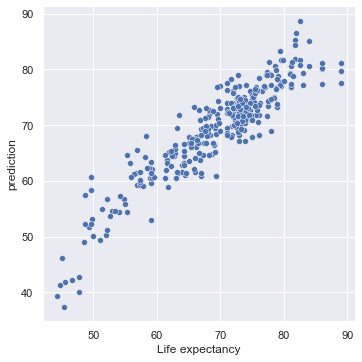

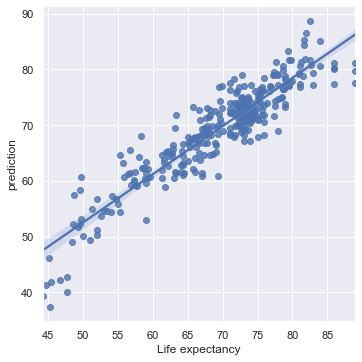

In [16]:
X = X_test.reset_index().copy() # make a copy of indices and data
X["Life expectancy"] = y_test.tolist()
X["prediction"] = predictions
sns.relplot(x="Life expectancy", y ="prediction", data=X, kind="scatter")
sns.lmplot(x = "Life expectancy", y = "prediction", data = X)

In [17]:
# import metrics from sklearn
from sklearn import metrics

In [18]:
model_r2 = metrics.r2_score(y_test, predictions)
model_r2

0.8514646098766653

In [91]:
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

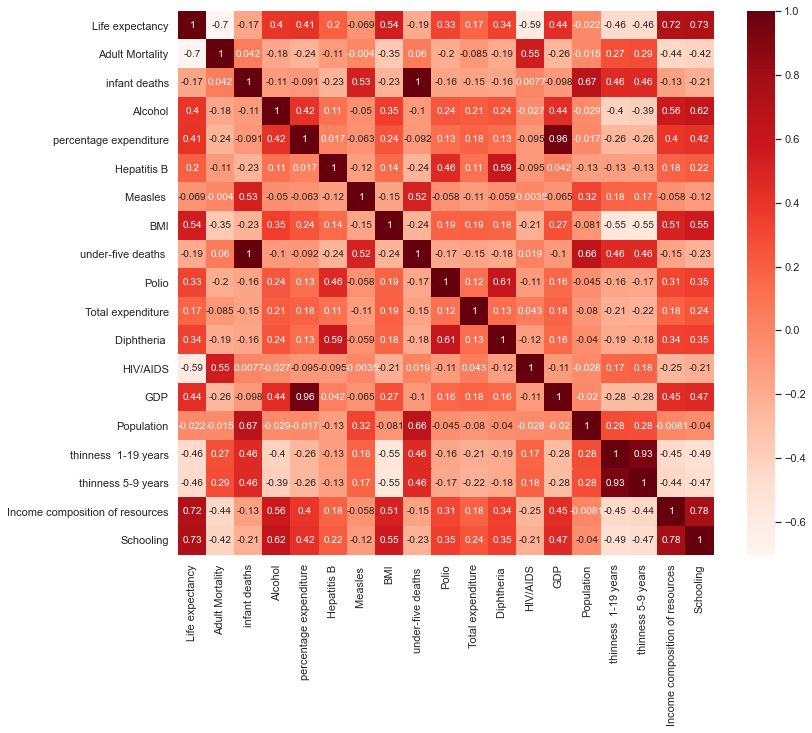

In [53]:
plt.figure(figsize=(12,10))
cor = who.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [62]:
cor_target = abs(cor["Life expectancy"])
relevant_features = cor_target[cor_target>0.5]
relevant_features


Life expectancy                    1.000000
Adult Mortality                    0.702523
BMI                                0.542042
HIV/AIDS                           0.592236
Income composition of resources    0.721083
Schooling                          0.727630
Name: Life expectancy, dtype: float64

In [76]:
#Adult Morality and BMI are > 0.5 correlated, keep Adult Morality 
#print(who[["Adult Mortality","BMI"]].corr())
#print(who[["Adult Mortality","HIV/AIDS"]].corr())
#print(who[["Income composition of resources","HIV/AIDS"]].corr())
#print(who[["Schooling","BMI"]].corr())

#BMI and Schooling are > 0.5 correlated, keep Schooling
#print(who[["BMI", 'HIV/AIDS' ]].corr())
#print(who[["BMI", 'Income composition of resources' ]].corr())
#print(who[["BMI", 'Schooling' ]].corr())

#not > 0.5 correlated, keep both
print(who[["HIV/AIDS", 'Income composition of resources']].corr())
print(who[["HIV/AIDS", 'Schooling' ]].corr())

                                 HIV/AIDS  Income composition of resources
HIV/AIDS                         1.000000                        -0.249519
Income composition of resources -0.249519                         1.000000
           HIV/AIDS  Schooling
HIV/AIDS   1.000000  -0.220429
Schooling -0.220429   1.000000


In [83]:
who = who.dropna(axis = "rows")
X = who[['Adult Mortality', 'BMI', 'HIV/AIDS', 'Income composition of resources', 'Schooling']]  # numpy array
y = who["Life expectancy"]                 # numpy array
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
model = LinearRegression()
model.fit(X=X_train, y=y_train)
predictions = model.predict(X_test)
for y, y_pred in list(zip(y_test, predictions))[:5]:
    print("Real value: {:.3f} Estimated value: {:.5f}".format(y, y_pred))

Real value: 71.600 Estimated value: 77.24157
Real value: 72.900 Estimated value: 72.45537
Real value: 74.100 Estimated value: 70.01083
Real value: 66.300 Estimated value: 65.85811
Real value: 56.200 Estimated value: 62.96929


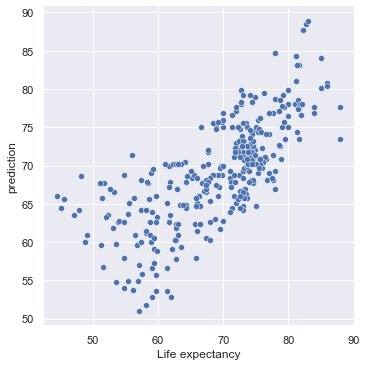

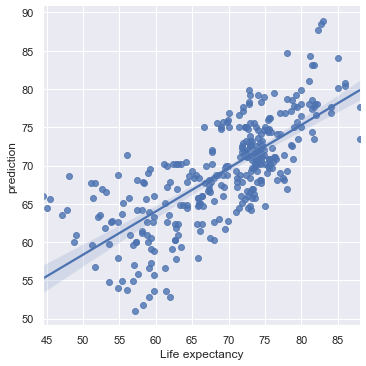

In [99]:
X = X_test.reset_index().copy() # make a copy of indices and data
X["Life expectancy"] = y_test.tolist()
X["prediction"] = predictions
sns.relplot(x="Life expectancy", y ="prediction", data=X, kind="scatter")
sns.lmplot(x = "Life expectancy", y = "prediction", data = X)

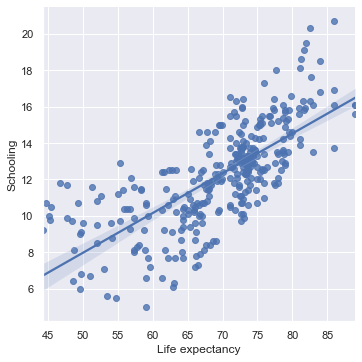

In [19]:
sns.lmplot(x = "Life expectancy", y = "Schooling", data = X)